# Перед тем как мы начнем

В двух словах про Python

Тут будет лекция

In [53]:
print("Hello world")

Hello world


In [55]:
# Комментарий
# Назначеие переменных

my_var = 5

In [56]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

This is more than 3!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [57]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [59]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [62]:
2+2*2

6

In [10]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [11]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv ('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [13]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [46]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [14]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений. 

Пустых значений нет. 


In [16]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Давайте тут вспомним, что вообще такое коэффициент корреляции? От чего он зависит? О чем говорит? А о чем не говорит? В каких пределах измеряется? Какие значения КофКорр считаются значимыми? 

In [18]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['Attrition'].nunique()

2

In [100]:
# Как мы с вами только что убедились, есть только два гендера

In [19]:
# Теперь глянем, что это за гендеры?
df_hr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [ ]:
"""

У нас есть только бинарные текстовые данные. Только yes, no.  

"""



In [20]:
df_hr['Attrition'].count()

1470

In [21]:
df_hr['Attrition'].sum()

'YesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoY

In [ ]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [22]:
df_hr['Attrition'].sum()

'YesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoY

In [23]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [24]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* float64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [25]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='DailyRate'>

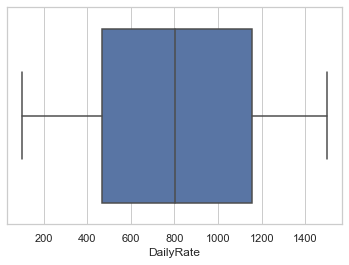

In [26]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["DailyRate"])

In [ ]:
# Видим, что распределение несмещенное, нет выбросов
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

Text(0, 0.5, 'Amount of employees')

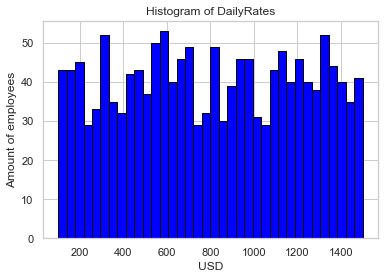

In [27]:
# matplotlib histogram
plt.hist(df_hr['DailyRate'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of DailyRates')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что распределение равномерное

In [32]:
import numpy as np

In [33]:
# Среднее значение по дневной ставке
np.mean(df_hr.DailyRate)

802.4857142857143

In [34]:
# А медиана? 
np.median(df_hr.DailyRate)

802.0

In [ ]:
# Обращает внимание что медиана равна среднему значению 

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [35]:
# Variance (дисперсия) зарплат
np.var(df_hr.DailyRate)

162708.83210884358

In [36]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.DailyRate)

403.37182860091207

In [38]:
3*np.std(df_hr.DailyRate)

1210.1154858027362

In [76]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?
# Три среднеквадратических отклонения нужны для определения аномальных значений. 

# Сделаем подвыборку из выборки

In [49]:
# Выделим в отдельные массивы сотрудников с разными Attrition
df_hr_g1 = df_hr[df_hr['Attrition'] == 'Yes']
df_hr_g0 = df_hr[df_hr['Attrition'] == 'No']

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [48]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [51]:
mylist = [2,14,21]

In [52]:
print("Count of Attrition = 'Yes'\
 is {} and for Attrition = 'No' is {}".format(len(df_hr_g1),
                                           len(df_hr_g0)))

Count of Attrition = 'Yes' is 237 and for Attrition = 'No' is 1233


In [53]:
print("Median of DailyRate for Attrition = 'Yes' \
is {} and for Attrition = 'No' is {}".format(np.median(df_hr_g1.DailyRate),
                                           np.median(df_hr_g0.DailyRate)))

Median of DailyRate for Attrition = 'Yes' is 699.0 and for Attrition = 'No' is 817.0


<AxesSubplot:xlabel='DailyRate'>

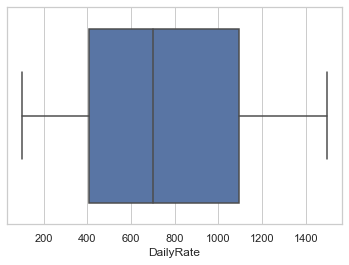

In [54]:
sns.boxplot(x=df_hr_g1["DailyRate"])

<AxesSubplot:xlabel='DailyRate'>

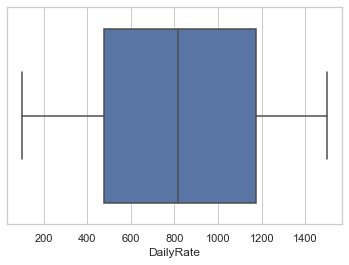

In [56]:
sns.boxplot(x=df_hr_g0["DailyRate"])

Text(0, 0.5, 'Amount of employees')

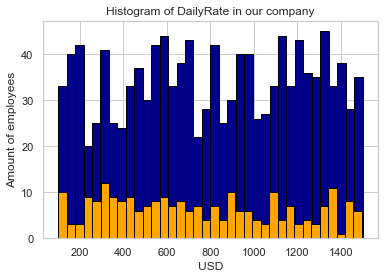

In [58]:
plt.hist(df_hr_g0['DailyRate'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['DailyRate'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of DailyRate in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых очень высокая месячная ставка
* Сотрудники, у которых количество лет проработанных на одной позиции больше 8


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [65]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_rates'] = np.where(
                            df_hr['MonthlyRate'] > 
                            np.mean(df_hr.MonthlyRate) + 3*np.std(df_hr.MonthlyRate),                 
                            1, 0)

In [66]:
df_anomally_rates = df_hr[df_hr['anomally_rates'] == 1]

df_anomally_rates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_years,anomally_rates


In [ ]:
"""

У нас получилось 0 человек с ультравысокой месячной ставкой. 
Вероятно лидеры бизнеса лии не проходили, или у них очень средняя месячная ставка, или они работают за процент. 


"""

## Оценка абсентеизма - количества отсутствий на рабочем месте

(array([244.,  57., 372., 135., 104.,  36.,  37., 222.,  89.,   0.,  67.,
         29.,  22.,  10.,  14.,  11.,   8.,   7.,   4.,   2.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <BarContainer object of 20 artists>)

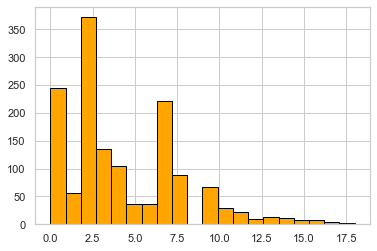

In [67]:
plt.hist(df_hr['YearsInCurrentRole'], color = 'orange', edgecolor = 'black', bins = 20)


Давайте также посчитаем где лежит 90-й перцентиль. 



In [71]:
df_hr.YearsInCurrentRole.quantile(q=0.9)

9.0

Это означает, что 90% сотрудников в выборке имеют менее 9 лет в одной роли.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 9 и более лет. 

In [72]:
df_hr_ab = df_hr[df_hr['YearsInCurrentRole'] > 8]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_years,anomally_rates
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,1,10,1,3,10,9,8,8,0,0
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,1,26,3,2,14,13,4,8,0,0
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,0,23,0,3,22,15,15,8,0,0
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,1,73,...,0,15,1,3,15,14,8,12,0,0
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,0,28,3,2,21,16,7,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,37,No,Travel_Rarely,161,Research & Development,10,3,Life Sciences,1,2017,...,1,16,2,3,16,11,6,8,0,0
1441,56,No,Non-Travel,667,Research & Development,1,4,Life Sciences,1,2026,...,1,13,2,2,13,12,1,9,0,0
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,1,14,4,1,10,9,9,8,0,0
1447,36,No,Non-Travel,301,Sales,15,4,Marketing,1,2036,...,1,15,4,2,15,12,11,11,0,0


Получили 174 человек, они проработали 9 и более лет. 

# Выводы по набору данных

Что мы сейчас обнаружили: 

1.	Набор содержит информацию о 1470 сотрудниках, часть сотрудников уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках
2.	 Пустых значений нет. 
3.	Рассматриваю параметры возраст и worklifebalance. 
a.	Возраст рассматривается исходя из данных: 
i.	Средний возраст – 36,9. Стандартное отклонение – 9. Минимальный возраст – 18. Максимальный возраст – 60. 
ii.	Скорее всего по 5 балльной шкале оценивается worklifebalance, но максимальный балл – 4. Получается, что либо ни у кого нет на 5, либо все-таки 4 – максимум. 
iii.	Корреляция между возрастом и worklifebalance отрицательная. То есть чем выше возраст, тем ниже worklifebalance, и наоборот. Также параллельно с этой темой влияет ли количество лет работы в компании на worklifebalance. Здесь корреляция равна 0.012089, она совершенно незначительная. Ее почти нет, очень близка к нулю. Связи почти нет. 
4.	Attrition – 2 варианта: Yes, No. У нас есть только бинарные текстовые данные. Только yes, no.  
5.	Распределение проанализировано по DailyRate . Ящик с усами по параметру DailyRate, распределение несмещенное, нет выбросов. 
6.	Распределение равномерное
7.	Среднее значение по дневной ставке - 802.4857142857143
8.	Медиана по дневной ставке - 802.0
9.	Медиана равна среднему значению
10.	Дисперсия по дневной ставке - 162708.83210884358
11.	Среднеквадратическое отклонение по дневной ставке - 403.37182860091207
12.	Count of Attrition = 'Yes' is 237 and for Attrition = 'No' is 1233
13.	Median of DailyRate for Attrition = 'Yes' is 699.0 and for Attrition = 'No' is 817.0
14.	У тех, кто ушел DailyRate ниже, чем у тех, кто остался. Вероятно это могла быть причина ухода. 
